# Exploratory Data Analysis (EDA)

**Input**: Датасет `data/raw/df_common.csv`

---

## 0. Preparations

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('data/raw/df_common.csv', index_col=0)

def print_separator(name: str = '', length = 100):
    print('=' * length)
    if len(name) != 0: 
        print(name.upper())
        print('=' * length, '\n')

print_separator('data reading')

print(f'dataset size: {df.shape[0]:,} rows, {df.shape[1]} columns')
print(f'columns names: {list(df.columns)}')
print('first 10 rows:')
display(df.head(10))

print_separator('dataset info')
df.info()

DATA READING

dataset size: 389,561 rows, 9 columns
columns names: ['source_platform', 'is_verified', 'text_raw', 'is_toxic', 'toxicity_type', 'clean_text', 'clean_text_no_stopwords', 'text_length', 'text_length_no_stopwords']
first 10 rows:


,source_platform,is_verified,text_raw,is_toxic,toxicity_type,clean_text,clean_text_no_stopwords,text_length,text_length_no_stopwords
dataset_id,,,,,,,,,
0,"2ch, pikabu",1,"Верблюдов-то за что? Дебилы, бл...",1,NaN,верблюдов то за что дебилы бл REPEAT_PUNCT,верблюдов дебилы REPEAT_PUNCT,7,3
0,"2ch, pikabu",1,"Хохлы, это отдушина затюканого россиянина, мол...",1,NaN,хохлы это отдушина затюканого россиянина мол в...,хохлы отдушина затюканого россиянина мол вон х...,21,11
0,"2ch, pikabu",1,Собаке - собачья смерть,1,NaN,собаке собачья смерть,собаке собачья смерть,3,3
0,"2ch, pikabu",1,"Страницу обнови, дебил. Это тоже не оскорблени...",1,NaN,страницу обнови дебил это тоже не оскорбление ...,страницу обнови дебил оскорбление доказанный ф...,31,14
0,"2ch, pikabu",1,"тебя не убедил 6-страничный пдф в том, что Скр...",1,NaN,тебя не убедил NUMBER страничный пдф в том что...,убедил NUMBER страничный пдф скрипалей отравил...,19,11
0,"2ch, pikabu",1,Для каких стан является эталоном современная с...,1,NaN,для каких стан является эталоном современная с...,каких стан является эталоном современная систе...,14,10
0,"2ch, pikabu",1,В шапке были ссылки на инфу по текущему фильму...,0,NORMAL,в шапке были ссылки на инфу по текущему фильму...,шапке ссылки инфу текущему фильму марвел ссылк...,43,27
0,"2ch, pikabu",1,УПАД Т! ТАМ НЕЛЬЗЯ СТРОИТЬ! ТЕХНОЛОГИЙ НЕТ! РА...,1,NaN,упад т там нельзя строить технологий нет разво...,упад строить технологий разворуют трещинами по...,21,11
0,"2ch, pikabu",1,"Ебать тебя разносит, шизик.",1,NaN,ебать тебя разносит шизик,ебать разносит шизик,4,3


DATASET INFO

<class 'pandas.core.frame.DataFrame'>
Index: 389561 entries, 0 to 7
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   source_platform           389561 non-null  object
 1   is_verified               389561 non-null  int64 
 2   text_raw                  389561 non-null  object
 3   is_toxic                  389561 non-null  int64 
 4   toxicity_type             383247 non-null  object
 5   clean_text                389561 non-null  object
 6   clean_text_no_stopwords   388857 non-null  object
 7   text_length               389561 non-null  int64 
 8   text_length_no_stopwords  389561 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 29.7+ MB


## 1. Basic statistics (df.describe)


In [58]:
print_separator('basic statistics about dataset fields')
display(df.describe(include='all').T)

BASIC STATISTICS ABOUT DATASET FIELDS



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
source_platform,389561,8,ok.ru,244771,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_verified,389561.0,NaN,NaN,NaN,0.984077,0.125178,0.0,1.0,1.0,1.0,1.0
text_raw,389561,389561,"Верблюдов-то за что? Дебилы, бл...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_toxic,389561.0,NaN,NaN,NaN,0.449131,0.497406,0.0,0.0,0.0,1.0,1.0
toxicity_type,383247,10,NORMAL,214597,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clean_text,389561,389561,верблюдов то за что дебилы бл REPEAT_PUNCT,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clean_text_no_stopwords,388857,381889,REPEAT_PUNCT,183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text_length,389561.0,NaN,NaN,NaN,14.818372,17.190206,1.0,6.0,10.0,18.0,1785.0
text_length_no_stopwords,389561.0,NaN,NaN,NaN,8.972269,10.608217,0.0,4.0,6.0,11.0,999.0


## 1. Missing values analysis

MISSING DATA

                   Field  missings    %
         source_platform         0 0.00
             is_verified         0 0.00
                text_raw         0 0.00
                is_toxic         0 0.00
           toxicity_type      6314 1.62
              clean_text         0 0.00
 clean_text_no_stopwords       704 0.18
             text_length         0 0.00
text_length_no_stopwords         0 0.00
Dataset sparsity: 0.20%
Total cells count: 3,506,049
Total missing cells count: 7,018


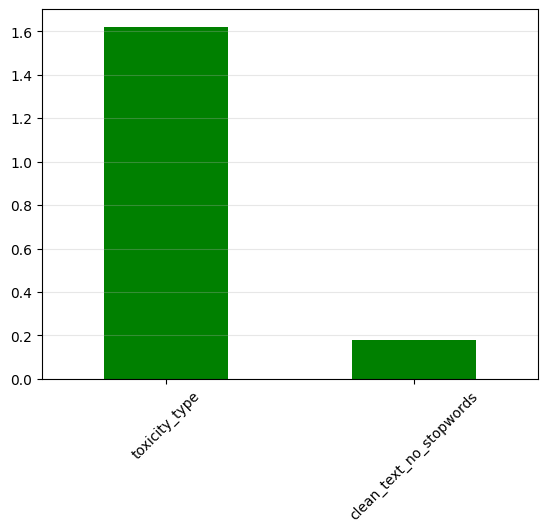

In [59]:
print_separator('missing data')

missing_data = pd.DataFrame({
    'Field': df.columns,
    'missings': df.isnull().sum(),
    '%': (df.isnull().sum() / len(df) * 100).round(2),
})

print(missing_data.to_string(index=False))

print_separator()

total_cells = df.shape[0] * df.shape[1]
total_missing = df.isnull().sum().sum()
sparsity = (total_missing / total_cells) * 100

print(f'Dataset sparsity: {sparsity:.2f}%')
print(f'Total cells count: {total_cells:,}')
print(f'Total missing cells count: {total_missing:,}')

missing_percent = (df.isnull().sum() / len(df) * 100)
missing_percent[missing_percent > 0].plot(kind='bar', color='green')
plt.title = 'Процент пропущенных значений'
plt.ylabel = 'Процент (%)'
plt.tick_params(axis='x', rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.show()

// TODO: replace this logic to dataset parcer + creator

1. **Вычисление `is_toxic` из `toxicity_type`**,
    - Если `is_toxic` отсутствует, вычисляем его из типа токсичности,
    - Токсичные типы (`INSULT`, `THREAT`, etc.) → `is_toxic = 1`,
    - Нетоксичный тип (`NORMAL`) → `is_toxic = 0`,
    - **Результат**: Максимальное использование доступной разметки,
2. **Заполнение `toxicity_type = 'NORMAL'`**,
    - Если `toxicity_type` пустой и `is_toxic == 0` → заполняем `NORMAL`,
    - **Результат**: Консистентность данных,

In [60]:
toxic_types = ['INSULT', 'INAPPROPRIATE', 'THREAT', 'OBSCENITY', 'SENSITIVE']
non_toxic_types = ['NORMAL']

# toxicity_type -> is_toxic, if is_toxic is empty
mask_compute_toxic = df['is_toxic'].isna() & df['toxicity_type'].notna()
if mask_compute_toxic.sum() > 0:
    df.loc[mask_compute_toxic & df['toxicity_type'].isin(toxic_types), 'is_toxic'] = 1.0
    df.loc[mask_compute_toxic & df['toxicity_type'].isin(non_toxic_types), 'is_toxic'] = 0.0

# is_toxic == 1 -> toxicity_type == 'NORMAL', if toxicity_type is empty
mask_compute_toxic = df['is_toxic'].isna() & df['toxicity_type'].notna()
mask_fill_normal = (df['is_toxic'] == 0) & df['toxicity_type'].isna()
filled_count = mask_fill_normal.sum()
if filled_count > 0:
    df.loc[mask_fill_normal, 'toxicity_type'] = 'NORMAL'

print_separator('basic statistics about dataset fields with toxic info field recovery')
display(df.describe(include='all').T)

BASIC STATISTICS ABOUT DATASET FIELDS WITH TOXIC INFO FIELD RECOVERY



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
source_platform,389561,8,ok.ru,244771,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_verified,389561.0,NaN,NaN,NaN,0.984077,0.125178,0.0,1.0,1.0,1.0,1.0
text_raw,389561,389561,"Верблюдов-то за что? Дебилы, бл...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_toxic,389561.0,NaN,NaN,NaN,0.449131,0.497406,0.0,0.0,0.0,1.0,1.0
toxicity_type,383247,10,NORMAL,214597,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clean_text,389561,389561,верблюдов то за что дебилы бл REPEAT_PUNCT,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clean_text_no_stopwords,388857,381889,REPEAT_PUNCT,183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text_length,389561.0,NaN,NaN,NaN,14.818372,17.190206,1.0,6.0,10.0,18.0,1785.0
text_length_no_stopwords,389561.0,NaN,NaN,NaN,8.972269,10.608217,0.0,4.0,6.0,11.0,999.0


MISSING DATA WITH TOXIC INFO FIELD RECOVERY

                   Field  missings    %
         source_platform         0 0.00
             is_verified         0 0.00
                text_raw         0 0.00
                is_toxic         0 0.00
           toxicity_type      6314 1.62
              clean_text         0 0.00
 clean_text_no_stopwords       704 0.18
             text_length         0 0.00
text_length_no_stopwords         0 0.00
Dataset sparsity: 0.20%
Total cells count: 3,506,049
Total missing cells count: 7,018


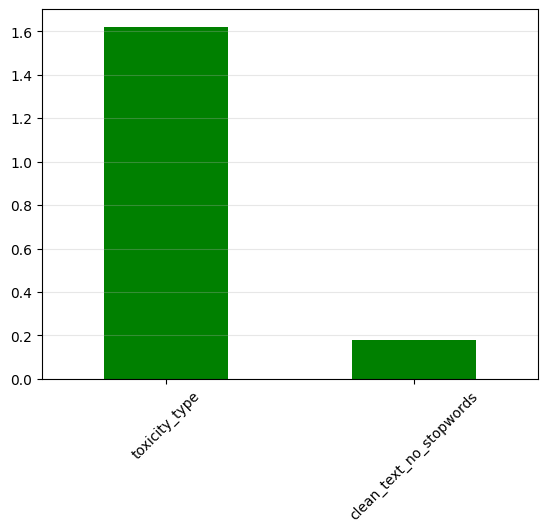

In [61]:
print_separator('missing data with toxic info field recovery')

missing_data = pd.DataFrame({
    'Field': df.columns,
    'missings': df.isnull().sum(),
    '%': (df.isnull().sum() / len(df) * 100).round(2),
})

print(missing_data.to_string(index=False))

print_separator()

total_cells = df.shape[0] * df.shape[1]
total_missing = df.isnull().sum().sum()
sparsity = (total_missing / total_cells) * 100

print(f'Dataset sparsity: {sparsity:.2f}%')
print(f'Total cells count: {total_cells:,}')
print(f'Total missing cells count: {total_missing:,}')

missing_percent = (df.isnull().sum() / len(df) * 100)
missing_percent[missing_percent > 0].plot(kind='bar', color='green')
plt.title = 'Persent of missing values'
plt.ylabel = '(%)'
plt.tick_params(axis='x', rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.show() 

## 2. Duplicates and mistakes

In [62]:
print_separator('text duplicate check')

duplicates_count = df.duplicated(subset=['text_raw']).sum()
print(f'{duplicates_count} text duplicate found')

if duplicates_count > 0:
    df = df.drop_duplicates(subset=['text_raw'])
    print(f'Duplicate text removed. There are {len(df)} unique rows left')


TEXT DUPLICATE CHECK

0 text duplicate found


In [63]:
print_separator('mistakes')

# 1. `is_toxic` must be 0 or 1
print('1. `is_toxic` value:')
invalid_toxic = ~df['is_toxic'].isin([0.0, 1.0, 0, 1])
value_mistakes = df[invalid_toxic]
print(f'   value mistakes count: {len(value_mistakes)}')

# 1. `is_toxic` should not conflict with `toxicity_type`
print('\n2. `is_toxic` and `toxicity_type` conflict:')
conflicting_toxic_status = (
    (df['is_toxic'] == 0.0) & 
    df['toxicity_type'].isin(toxic_types)
) | (
    (df['is_toxic'] == 1.0) & 
    df['toxicity_type'].isin(non_toxic_types)
)
conflict_mistakes = df[conflicting_toxic_status]
print(f'   conflict mistakes count: {len(conflict_mistakes)}')

print('\n2. Text length:')
min_len = df['text_raw'].str.len().min()
max_len = df['text_raw'].str.len().max()
print(f'   min: {min_len}, max: {max_len}')

short_texts = (df['text_raw'].str.len() < 3).sum()
if short_texts > 0:
    print(f'   {short_texts} rows with length < 3 symbols found')
    df = df[df['text_raw'].str.len() >= 3]

print(f'\nfinal size: {len(df)}')


MISTAKES

1. `is_toxic` value:
   value mistakes count: 0

2. `is_toxic` and `toxicity_type` conflict:
   conflict mistakes count: 0

2. Text length:
   min: 2, max: 11087
   1 rows with length < 3 symbols found

final size: 389560


## 3. Toxicity destribution

BINARY TOXICITY DESTRIBUTION

Toxic: 174964 (44.91%)
Non toxic: 214596 (55.09%)
Disbalance: 1:1.23


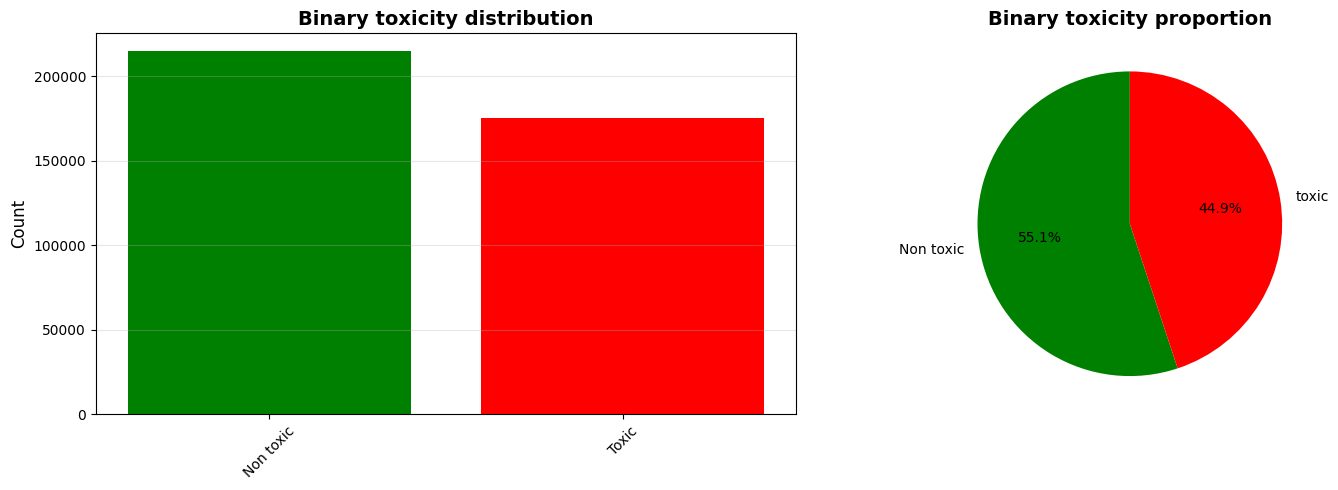

In [64]:
print_separator('binary toxicity destribution')

toxic = df[df['is_toxic'] == 1]
non_toxic = df[df['is_toxic'] == 0]

print(f'Toxic: {len(toxic)} ({len(toxic)/len(df)*100:.2f}%)')
print(f'Non toxic: {len(non_toxic)} ({len(non_toxic)/len(df)*100:.2f}%)')
print(f'Disbalance: 1:{len(non_toxic)/len(toxic):.2f}')

_, (binary_bar, binary_pie) = plt.subplots(1, 2, figsize=(15, 5))

counts = df['is_toxic'].value_counts()
binary_bar.bar(['Non toxic', 'Toxic'], counts.values, color=['green', 'red'])
binary_bar.set_title('Binary toxicity distribution', fontsize=14, fontweight='bold')
binary_bar.set_ylabel('Count', fontsize=12)
binary_bar.tick_params(axis='x', rotation=45)
binary_bar.grid(axis='y', alpha=0.3)


binary_pie.pie(counts.values, labels=['Non toxic', 'toxic'], autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
binary_pie.set_title('Binary toxicity proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


NON BINARY TOXICITY DESTRIBUTION



toxicity_type
NORMAL                     214596
SENSITIVE                   91375
INAPPROPRIATE               33060
INSULT                      28372
UNKNOWN TOXIC                6314
INSULT,THREAT                6280
THREAT                       5318
OBSCENITY                    2231
INSULT,OBSCENITY             1765
INSULT,OBSCENITY,THREAT       175
OBSCENITY,THREAT               74
Name: count, dtype: int64

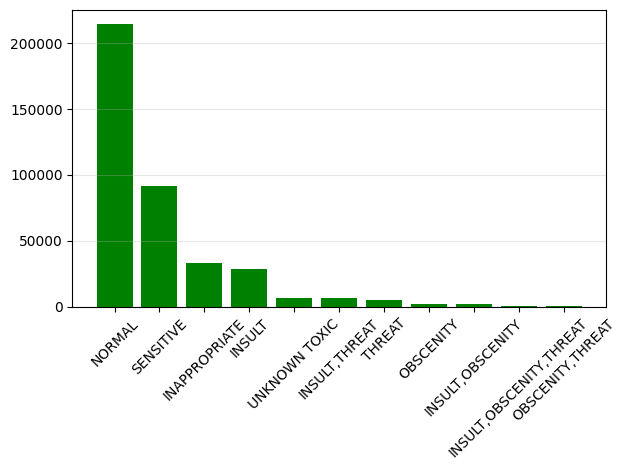

In [65]:
print_separator('non binary toxicity destribution')

types_counts = df['toxicity_type'].fillna('UNKNOWN TOXIC').value_counts()
display(types_counts)

plt.bar(types_counts.index, types_counts.values, color='green')
plt.title ='Non binary toxicity distribution'
plt.ylabel = 'Count'
plt.tick_params(axis='x', rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## 4. Basic statistics (lenght, symbols, words)

In [66]:
df['char_len'] = df['text_raw'].str.len()
df['word_len'] = df['text_raw'].str.split().str.len()

toxic = df[df['is_toxic'] == 1]
non_toxic = df[df['is_toxic'] == 0]

print_separator('Basic statistics (lenght, unique words)')

stats_df = pd.DataFrame({
    'Metrics': ['Mean symbols', 'median symbols', 'Std symbols',
                'Mean words', 'median words', 'Std words'],
    'Non toxic': [
        non_toxic['char_len'].mean(),
        non_toxic['char_len'].median(),
        non_toxic['char_len'].std(),
        non_toxic['word_len'].mean(),
        non_toxic['word_len'].median(),
        non_toxic['word_len'].std()
    ],
    'Toxic': [
        toxic['char_len'].mean(),
        toxic['char_len'].median(),
        toxic['char_len'].std(),
        toxic['word_len'].mean(),
        toxic['word_len'].median(),
        toxic['word_len'].std()
    ]
})
stats_df['Diff (%)'] = ((stats_df['Toxic'] - stats_df['Non toxic']) / stats_df['Non toxic'] * 100).round(2)

print(stats_df.to_string(index=False))
print(f'\nSmall conclusion: average toxic texts are shorter on {abs(stats_df.iloc[0]["Diff (%)"]):.1f}% tan non toxic')


BASIC STATISTICS (LENGHT, UNIQUE WORDS)

       Metrics  Non toxic     Toxic  Diff (%)
  Mean symbols  83.799512 95.459986     13.91
median symbols  48.000000 74.000000     54.17
   Std symbols 116.542528 93.011838    -20.19
    Mean words  13.372001 15.285693     14.31
  median words   8.000000 12.000000     50.00
     Std words  18.258083 14.828403    -18.78

Small conclusion: average toxic texts are shorter on 13.9% tan non toxic


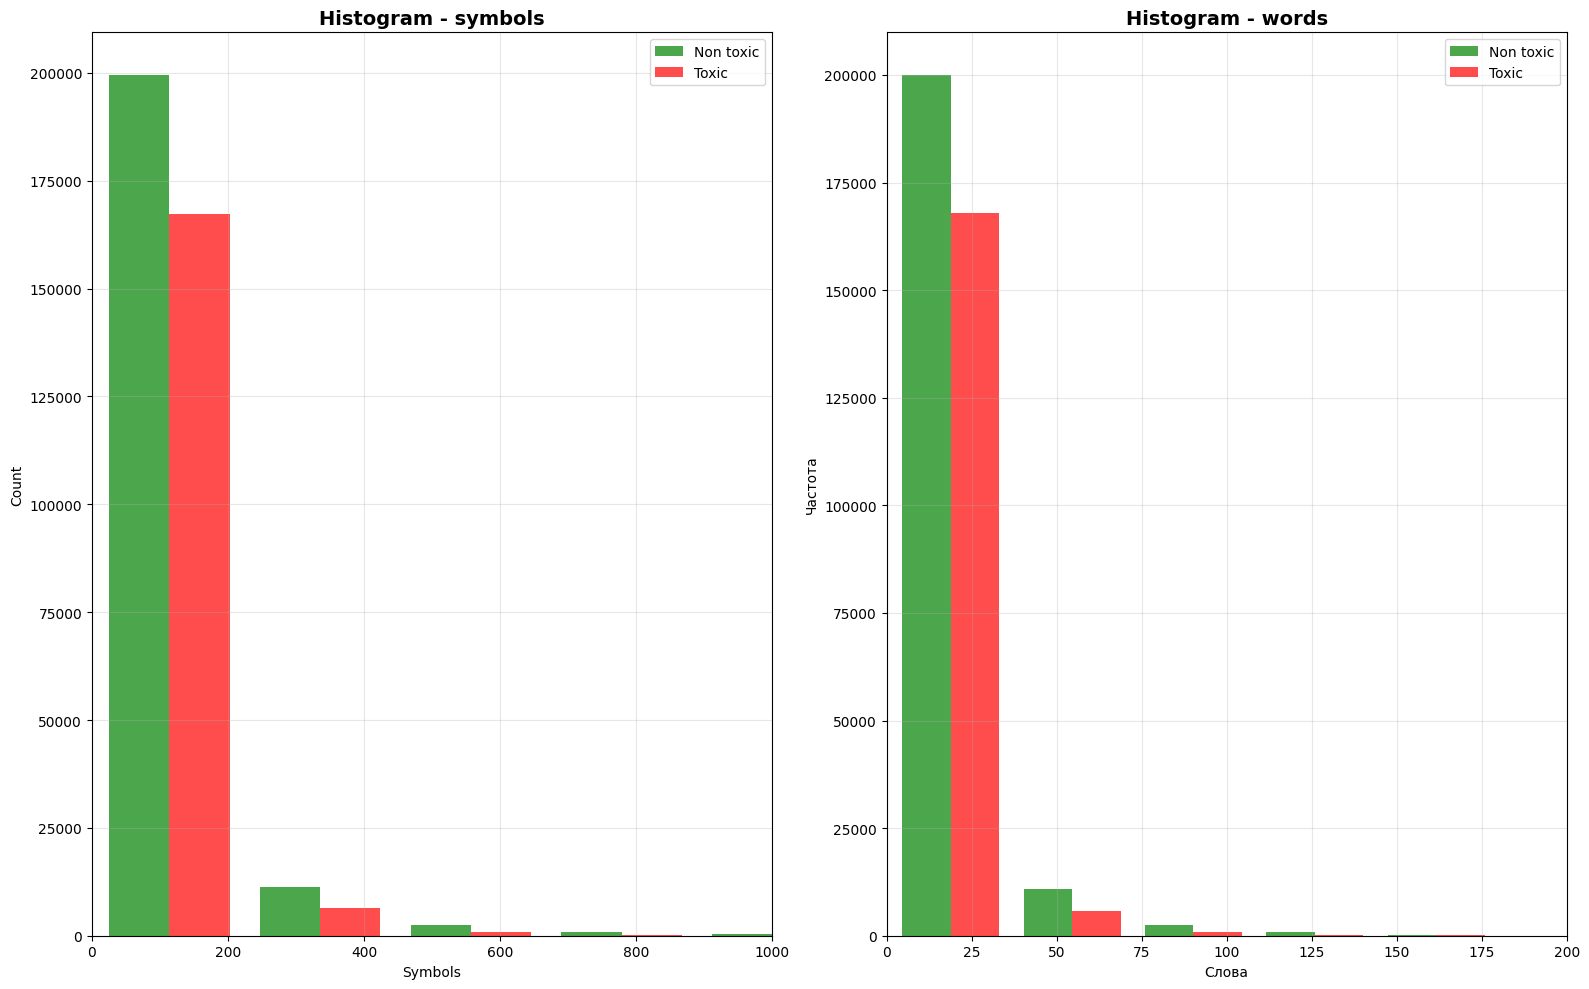

In [67]:
_, (symbols_histogram, words_histogram) = plt.subplots(1, 2, figsize=(16, 10))

# Histogram - symbols
symbols_histogram.hist([non_toxic['char_len'], toxic['char_len']], bins=50,
                label=['Non toxic', 'Toxic'], alpha=0.7, color=['green', 'red'])
symbols_histogram.set_title('Histogram - symbols', fontsize=14, fontweight='bold')
symbols_histogram.set_xlabel('Symbols')
symbols_histogram.set_ylabel('Count')
symbols_histogram.set_xlim(0, 1000)
symbols_histogram.legend()
symbols_histogram.grid(alpha=0.3)

# Histogram - words
words_histogram.hist([non_toxic['word_len'], toxic['word_len']], bins=50,
                label=['Non toxic', 'Toxic'], alpha=0.7, color=['green', 'red'])
words_histogram.set_title('Histogram - words', fontsize=14, fontweight='bold')
words_histogram.set_xlabel('Слова')
words_histogram.set_ylabel('Частота')
words_histogram.set_xlim(0, 200)
words_histogram.legend()
words_histogram.grid(alpha=0.3)

plt.tight_layout()
plt.show()


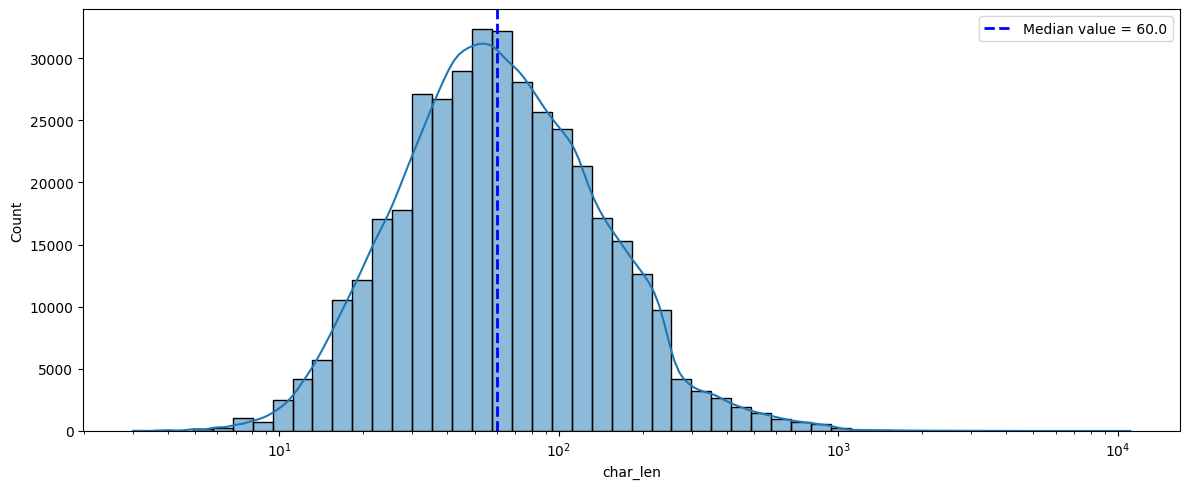

In [68]:
median_char = df['char_len'].median()

plt.figure(figsize=(12, 5))
sns.histplot(df['char_len'], bins=50, kde=True, log_scale=True)

plt.axvline(median_char, color='blue', linestyle='--', linewidth=2, label=f'Median value = {median_char:.1f}')

plt.title = 'Messages length distribution (in symbols)'
plt.xlabel = 'N_symbols'
plt.ylabel = 'Count'
plt.legend()
plt.tight_layout()
plt.show()

## 5. Token-Level Analysis


In [77]:
df = df.dropna(subset=['clean_text_no_stopwords'])
df['tokens'] = df['clean_text_no_stopwords'].apply(lambda x: x.split())
df['unique_words'] = df['tokens'].apply(lambda x: len(set(x)))

print(f'Symbols mean after clearing mean: {df["clean_text_no_stopwords"].str.len().mean():.1f} symbols')

Symbols mean after clearing mean: 69.7 symbols


In [78]:
df['cleaned_char_len'] = df['clean_text_no_stopwords'].str.len()
df['cleaned_word_len'] = df['clean_text_no_stopwords'].str.split().str.len()

toxic = df[df['is_toxic'] == 1]
non_toxic = df[df['is_toxic'] == 0]

print_separator('Basic statistics (lenght, unique words) after cleaning')

cleaned_stats_df = pd.DataFrame({
    'Metrics': ['Mean symbols', 'median symbols', 'Std symbols',
                'Mean words', 'median words', 'Std words'],
    'Non toxic': [
        non_toxic['cleaned_char_len'].mean(),
        non_toxic['cleaned_char_len'].median(),
        non_toxic['cleaned_char_len'].std(),
        non_toxic['cleaned_word_len'].mean(),
        non_toxic['cleaned_word_len'].median(),
        non_toxic['cleaned_word_len'].std()
    ],
    'Toxic': [
        toxic['cleaned_char_len'].mean(),
        toxic['cleaned_char_len'].median(),
        toxic['cleaned_char_len'].std(),
        toxic['cleaned_word_len'].mean(),
        toxic['cleaned_word_len'].median(),
        toxic['cleaned_word_len'].std()
    ]
})
cleaned_stats_df['Diff'] = ((cleaned_stats_df['Toxic'] - cleaned_stats_df['Non toxic']) / cleaned_stats_df['Non toxic'] * 100).round(2)

print(cleaned_stats_df.to_string(index=False))
print(f'\nSmall conclusion: average toxic texts are shorter on {abs(cleaned_stats_df.iloc[0]["Diff"]):.1f}% tan non toxic after cleaning')

BASIC STATISTICS (LENGHT, UNIQUE WORDS) AFTER CLEANING

       Metrics  Non toxic     Toxic   Diff
  Mean symbols  67.355257 72.660584   7.88
median symbols  40.000000 56.000000  40.00
   Std symbols  94.343748 72.806366 -22.83
    Mean words   8.706741  9.333208   7.20
  median words   5.000000  7.000000  40.00
     Std words  11.718398  9.062548 -22.66

Small conclusion: average toxic texts are shorter on 7.9% tan non toxic after cleaning


### 6. Frequency of words

FREQUENCY OF WORDS


Words count (toxic texts): 1,632,490
Unique words count (toxic texts): 225,582

Words count (non toxic texts): 1,862,755
Unique words count (non toxic texts): 223,292

Top-20 frequent words (toxic texts):
  REPEAT_PUNCT   : 35752
  number         : 26768
  просто         : 6703
  NUMBER         : 5275
  EMOJI          : 4790
  всё            : 4311
  вообще         : 4213
  ещё            : 4041
  очень          : 3879
  почему         : 3849

Top-20 frequent words (non toxic texts):
  REPEAT_PUNCT   : 64736
  NUMBER         : 61107
  EMOJI          : 26095
  очень          : 9478
  просто         : 6090
  спасибо        : 5994
  всё            : 5221
  ещё            : 5217
  EMOTICON       : 4766
  лет            : 4522


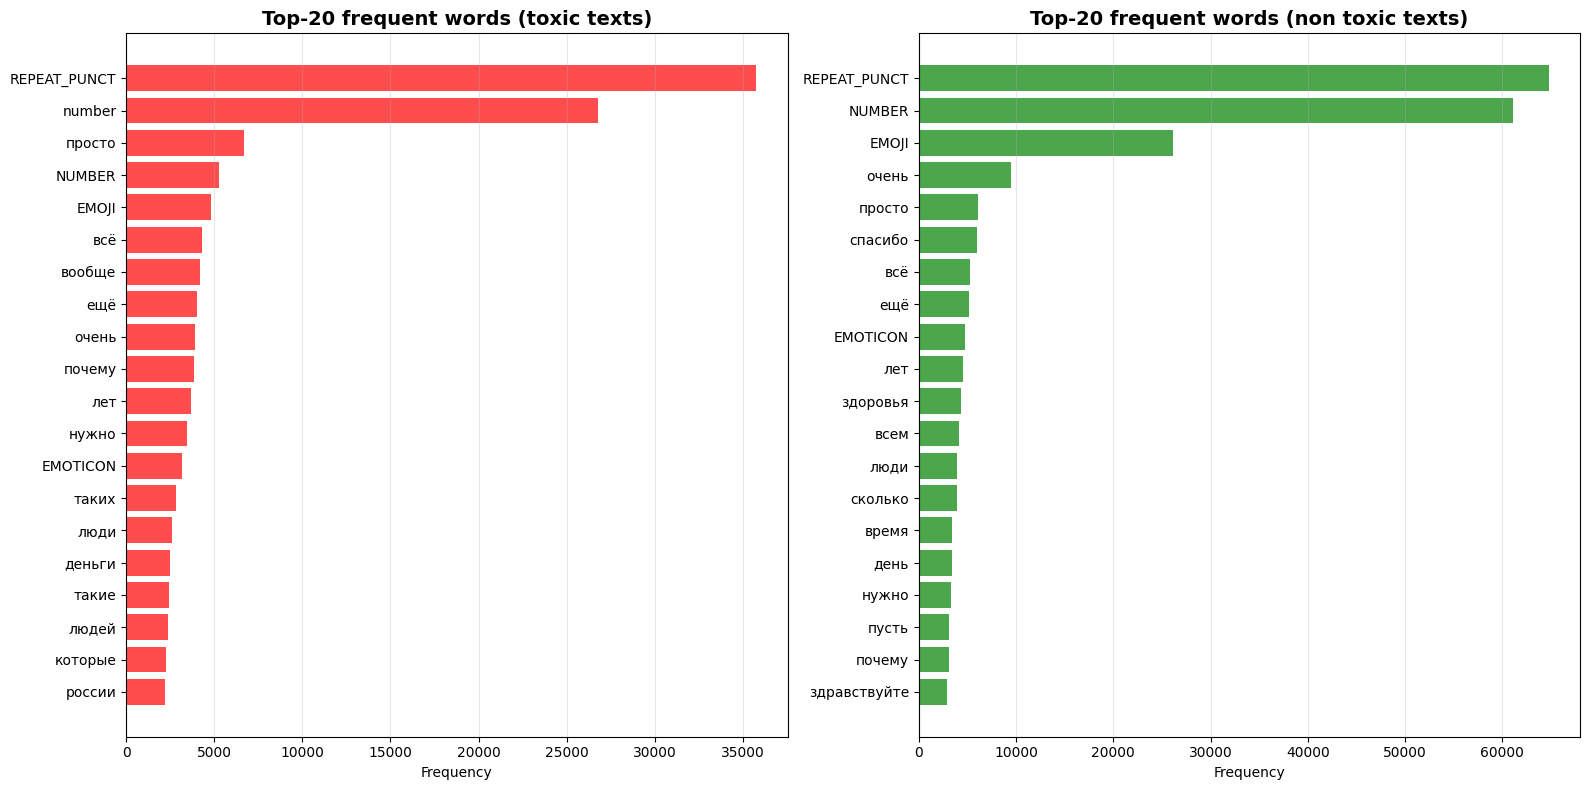

In [79]:
toxic_words = [word for tokens in toxic['tokens'] for word in tokens]
non_toxic_words = [word for tokens in non_toxic['tokens'] for word in tokens]

toxic_freq = Counter(toxic_words)
non_toxic_freq = Counter(non_toxic_words)

print_separator('Frequency of words')

print(f'\nWords count (toxic texts): {len(toxic_words):,}')
print(f'Unique words count (toxic texts): {len(set(toxic_words)):,}')
print(f'\nWords count (non toxic texts): {len(non_toxic_words):,}')
print(f'Unique words count (non toxic texts): {len(set(non_toxic_words)):,}')

print('\nTop-20 frequent words (toxic texts):')
for word, count in toxic_freq.most_common(10):
    print(f'  {word:15s}: {count}')

print('\nTop-20 frequent words (non toxic texts):')
for word, count in non_toxic_freq.most_common(10):
    print(f'  {word:15s}: {count}')

_, axes = plt.subplots(1, 2, figsize=(16, 8))

top_toxic = pd.DataFrame(toxic_freq.most_common(20), columns=['Word', 'Frequency'])
axes[0].barh(range(len(top_toxic)), top_toxic['Frequency'], color='red', alpha=0.7)
axes[0].set_yticks(range(len(top_toxic)))
axes[0].set_yticklabels(top_toxic['Word'])
axes[0].invert_yaxis()
axes[0].set_title('Top-20 frequent words (toxic texts)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Frequency')
axes[0].grid(axis='x', alpha=0.3)

top_non_toxic = pd.DataFrame(non_toxic_freq.most_common(20), columns=['Word', 'Frequency'])
axes[1].barh(range(len(top_non_toxic)), top_non_toxic['Frequency'], color='green', alpha=0.7)
axes[1].set_yticks(range(len(top_non_toxic)))
axes[1].set_yticklabels(top_non_toxic['Word'])
axes[1].invert_yaxis()
axes[1].set_title('Top-20 frequent words (non toxic texts)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Frequency')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


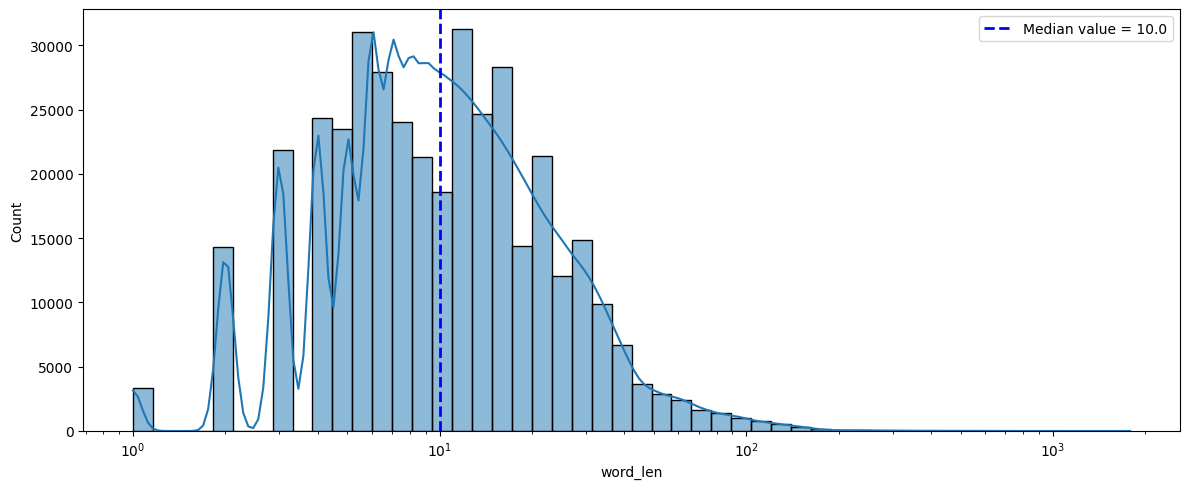

In [80]:
median_val = df['word_len'].median()

plt.figure(figsize=(12, 5))
sns.histplot(df['word_len'], bins=50, kde=True, log_scale=True)

plt.axvline(median_val, color='blue', linestyle='--', linewidth=2, label=f'Median value = {median_val:.1f}')

plt.title ='Messages length distribution (in words)'
plt.xlabel = 'N_words'
plt.ylabel = 'Messages count'
plt.legend()
plt.tight_layout()
plt.show()

### 9. Word Clouds


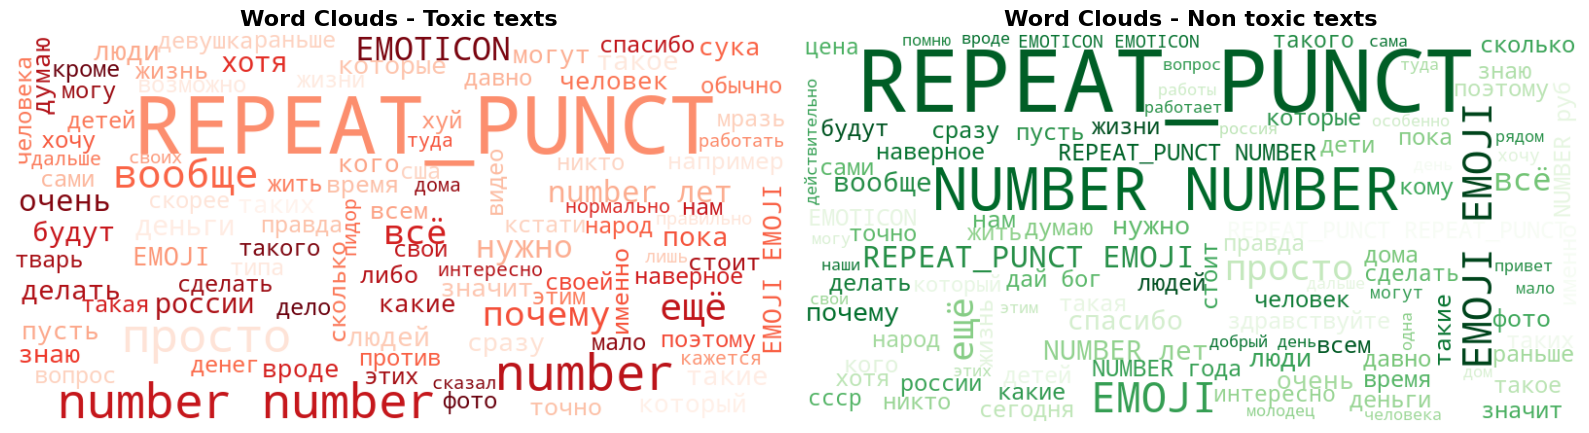

In [81]:
_, axes = plt.subplots(1, 2, figsize=(16, 8))

toxic_text = ' '.join(toxic['clean_text_no_stopwords'])
wordcloud_toxic = WordCloud(width=800, height=400, background_color='white',
                              colormap='Reds', max_words=100).generate(toxic_text)

axes[0].imshow(wordcloud_toxic, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Word Clouds - Toxic texts', fontsize=16, fontweight='bold')

non_toxic_text = ' '.join(non_toxic['clean_text_no_stopwords'])
wordcloud_non_toxic = WordCloud(width=800, height=400, background_color='white',
                                  colormap='Greens', max_words=100).generate(non_toxic_text)

axes[1].imshow(wordcloud_non_toxic, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Word Clouds - Non toxic texts', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


## 10. N-граммы (Bigrams и Trigrams)


Bigrams count(toxic text): 1,457,578, unique: 1,232,974
Bigrams count(non toxic text): 1,648,811, unique: 1,242,753
Trigrams count(toxic text): 1,284,164, unique: 1,262,543
Trigrams count(non toxic text): 1,444,882, unique: 1,355,864


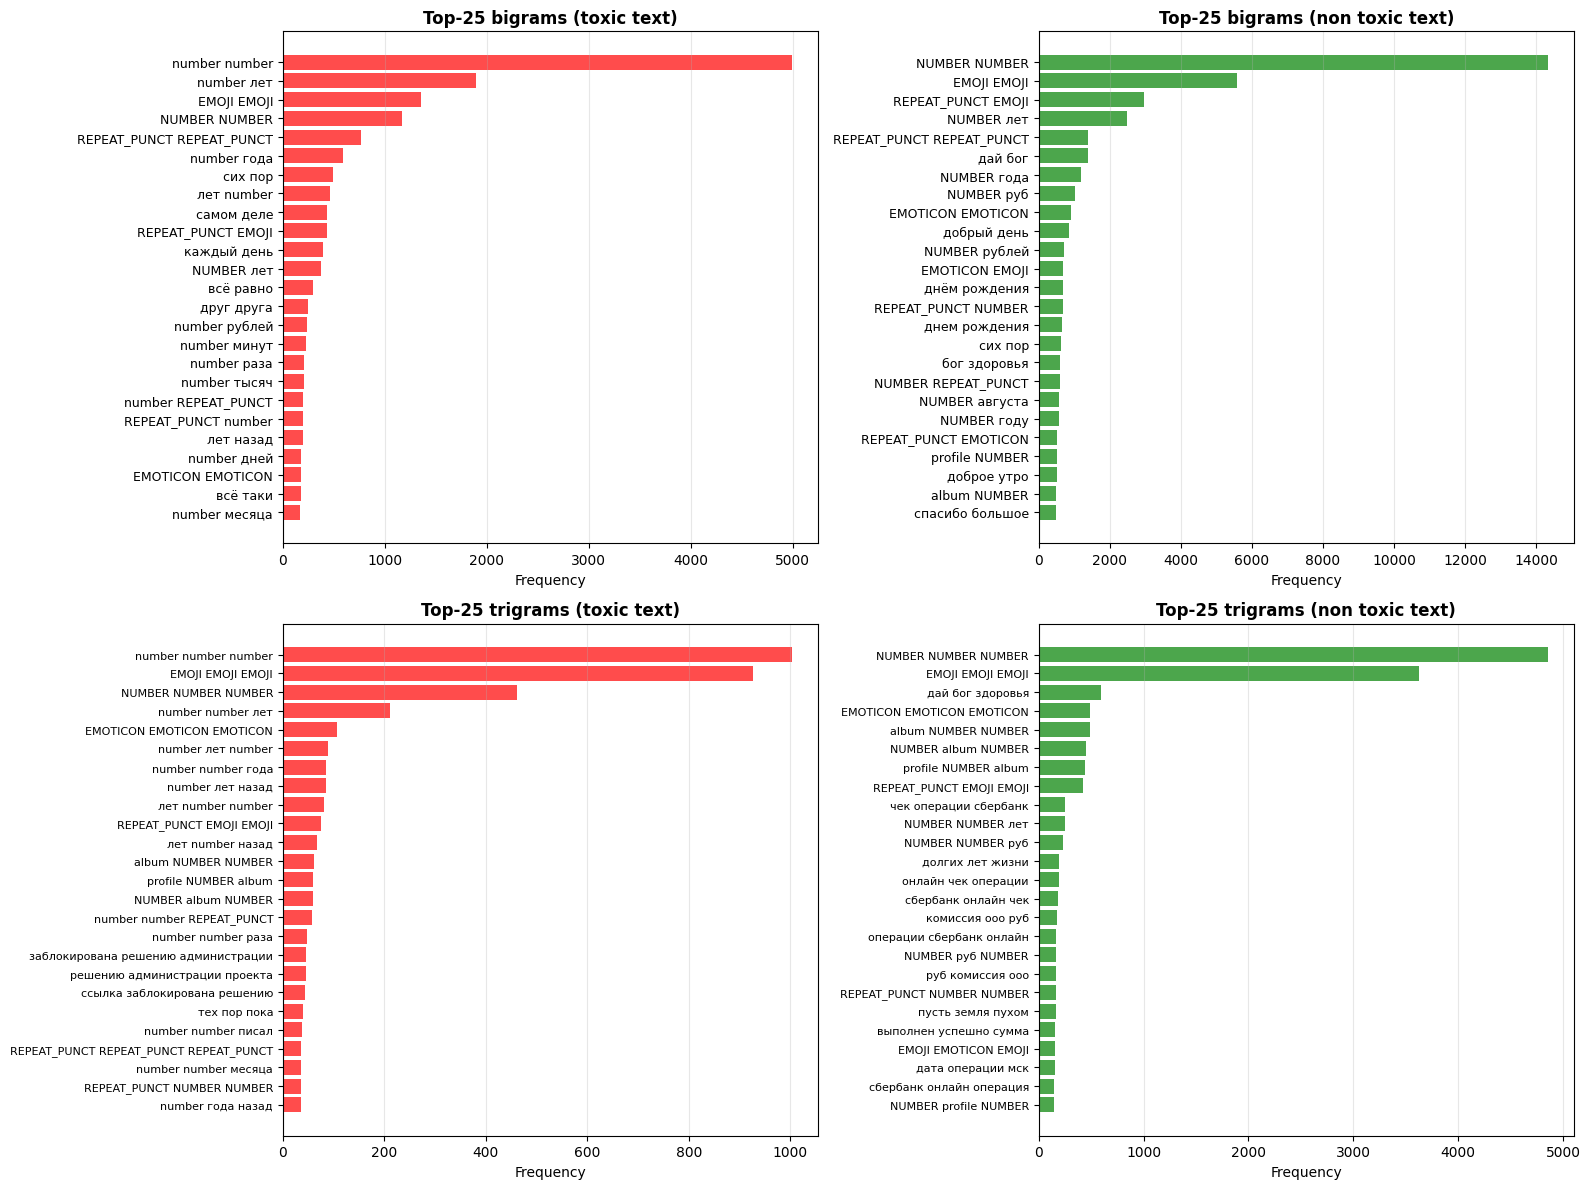

In [82]:
def get_ngrams(tokens, n):
    return [' '.join(tokens[i:i+n]) for i in range(len(tokens)-n+1)]

toxic_bigrams = []
toxic_trigrams = []
for tokens in toxic['tokens']:
    toxic_bigrams.extend(get_ngrams(tokens, 2))
    toxic_trigrams.extend(get_ngrams(tokens, 3))

non_toxic_bigrams = []
non_toxic_trigrams = []
for tokens in non_toxic['tokens']:
    non_toxic_bigrams.extend(get_ngrams(tokens, 2))
    non_toxic_trigrams.extend(get_ngrams(tokens, 3))

toxic_bi_freq = Counter(toxic_bigrams)
toxic_tri_freq = Counter(toxic_trigrams)
non_toxic_bi_freq = Counter(non_toxic_bigrams)
non_toxic_tri_freq = Counter(non_toxic_trigrams)

print(f'Bigrams count(toxic text): {len(toxic_bigrams):,}, unique: {len(toxic_bi_freq):,}')
print(f'Bigrams count(non toxic text): {len(non_toxic_bigrams):,}, unique: {len(non_toxic_bi_freq):,}')
print(f'Trigrams count(toxic text): {len(toxic_trigrams):,}, unique: {len(toxic_tri_freq):,}')
print(f'Trigrams count(non toxic text): {len(non_toxic_trigrams):,}, unique: {len(non_toxic_tri_freq):,}')

_, axes = plt.subplots(2, 2, figsize=(16, 12))

top_bi_toxic = pd.DataFrame(toxic_bi_freq.most_common(25), columns=['Bigrams', 'Frequency'])
axes[0, 0].barh(range(len(top_bi_toxic)), top_bi_toxic['Frequency'], color='red', alpha=0.7)
axes[0, 0].set_yticks(range(len(top_bi_toxic)))
axes[0, 0].set_yticklabels(top_bi_toxic['Bigrams'], fontsize=9)
axes[0, 0].invert_yaxis()
axes[0, 0].set_title('Top-25 bigrams (toxic text)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Frequency')
axes[0, 0].grid(axis='x', alpha=0.3)

top_bi_non_toxic = pd.DataFrame(non_toxic_bi_freq.most_common(25), columns=['Bigrams', 'Frequency'])
axes[0, 1].barh(range(len(top_bi_non_toxic)), top_bi_non_toxic['Frequency'], color='green', alpha=0.7)
axes[0, 1].set_yticks(range(len(top_bi_non_toxic)))
axes[0, 1].set_yticklabels(top_bi_non_toxic['Bigrams'], fontsize=9)
axes[0, 1].invert_yaxis()
axes[0, 1].set_title('Top-25 bigrams (non toxic text)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Frequency')
axes[0, 1].grid(axis='x', alpha=0.3)

top_tri_toxic = pd.DataFrame(toxic_tri_freq.most_common(25), columns=['Trigrams', 'Frequency'])
axes[1, 0].barh(range(len(top_tri_toxic)), top_tri_toxic['Frequency'], color='red', alpha=0.7)
axes[1, 0].set_yticks(range(len(top_tri_toxic)))
axes[1, 0].set_yticklabels(top_tri_toxic['Trigrams'], fontsize=8)
axes[1, 0].invert_yaxis()
axes[1, 0].set_title('Top-25 trigrams (toxic text)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Frequency')
axes[1, 0].grid(axis='x', alpha=0.3)

top_tri_non_toxic = pd.DataFrame(non_toxic_tri_freq.most_common(25), columns=['Trigrams', 'Frequency'])
axes[1, 1].barh(range(len(top_tri_non_toxic)), top_tri_non_toxic['Frequency'], color='green', alpha=0.7)
axes[1, 1].set_yticks(range(len(top_tri_non_toxic)))
axes[1, 1].set_yticklabels(top_tri_non_toxic['Trigrams'], fontsize=8)
axes[1, 1].invert_yaxis()
axes[1, 1].set_title('Top-25 trigrams (non toxic text)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Frequency')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


## 11. TF-IDF analysis


In [83]:
sample_size = min(10000, len(df))
df_sample = df.sample(n=sample_size, random_state=1)

print(f'TF-IDF analysis with {sample_size:,} texts...')

vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2), 
                              min_df=5, max_df=0.7)
tfidf_matrix = vectorizer.fit_transform(df_sample['clean_text'])
feature_names = vectorizer.get_feature_names_out()

print(f'TF-IDF matrix shape: {tfidf_matrix.shape}')
print(f'Features count: {len(feature_names)}')


TF-IDF analysis with 10,000 texts...
TF-IDF matrix shape: (10000, 1000)
Features count: 1000


TF-IDF ANALYSIS

Top-10 features(toxic texts):
     feature    toxic  non_toxic
          не 0.055992   0.050261
repeat_punct 0.052328   0.065531
      number 0.042226   0.043289
          на 0.040430   0.035268
         что 0.032979   0.027234
         это 0.031070   0.029974
         как 0.024320   0.020450
       emoji 0.023240   0.033337
          то 0.020334   0.016324
          за 0.019348   0.018978

Top-10 features(non toxic texts):
     feature    toxic  non_toxic
repeat_punct 0.052328   0.065531
          не 0.055992   0.050261
      number 0.042226   0.043289
          на 0.040430   0.035268
       emoji 0.023240   0.033337
         это 0.031070   0.029974
         что 0.032979   0.027234
         как 0.024320   0.020450
          за 0.019348   0.018978
         все 0.017732   0.017773

Top-10 features by diff (toxic > non-toxic):
feature    toxic  non_toxic     diff
    что 0.032979   0.027234 0.005745
     не 0.055992   0.050261 0.005731
     на 0.040430   0.035268 0.00516

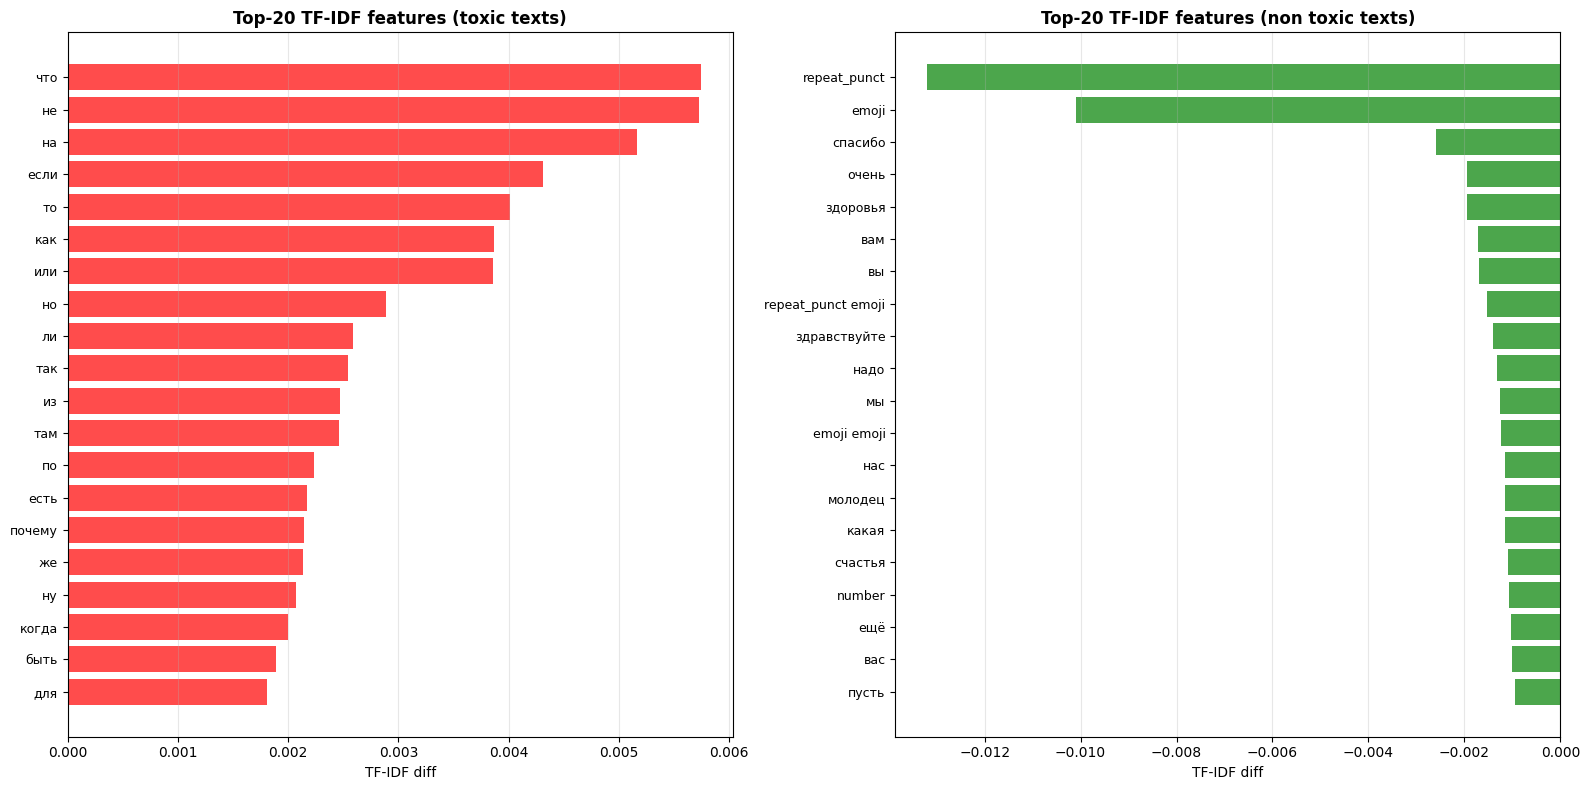

In [84]:
toxic_idx = df_sample[df_sample['is_toxic'] == 1].index
non_toxic_idx = df_sample[df_sample['is_toxic'] == 0].index

toxic_tfidf = tfidf_matrix[df_sample.index.isin(toxic_idx)].mean(axis=0).A1
non_toxic_tfidf = tfidf_matrix[df_sample.index.isin(non_toxic_idx)].mean(axis=0).A1

tfidf_df = pd.DataFrame({
    'feature': feature_names,
    'toxic': toxic_tfidf,
    'non_toxic': non_toxic_tfidf,
    'diff': toxic_tfidf - non_toxic_tfidf
})

print_separator('TF-IDF analysis')
print('Top-10 features(toxic texts):')
print(tfidf_df.nlargest(10, 'toxic')[['feature', 'toxic', 'non_toxic']].to_string(index=False))

print('\nTop-10 features(non toxic texts):')
print(tfidf_df.nlargest(10, 'non_toxic')[['feature', 'toxic', 'non_toxic']].to_string(index=False))

print('\nTop-10 features by diff (toxic > non-toxic):')
print(tfidf_df.nlargest(10, 'diff')[['feature', 'toxic', 'non_toxic', 'diff']].to_string(index=False))

_, axes = plt.subplots(1, 2, figsize=(16, 8))

top_toxic_tfidf = tfidf_df.nlargest(20, 'diff')
axes[0].barh(range(len(top_toxic_tfidf)), top_toxic_tfidf['diff'], color='red', alpha=0.7)
axes[0].set_yticks(range(len(top_toxic_tfidf)))
axes[0].set_yticklabels(top_toxic_tfidf['feature'], fontsize=9)
axes[0].invert_yaxis()
axes[0].set_title('Top-20 TF-IDF features (toxic texts)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('TF-IDF diff')
axes[0].grid(axis='x', alpha=0.3)

top_non_toxic_tfidf = tfidf_df.nsmallest(20, 'diff')
axes[1].barh(range(len(top_non_toxic_tfidf)), top_non_toxic_tfidf['diff'], color='green', alpha=0.7)
axes[1].set_yticks(range(len(top_non_toxic_tfidf)))
axes[1].set_yticklabels(top_non_toxic_tfidf['feature'], fontsize=9)
axes[1].invert_yaxis()
axes[1].set_title('Top-20 TF-IDF features (non toxic texts)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('TF-IDF diff')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


## 12. Correlation analysis

In [85]:
df.describe()

,is_verified,is_toxic,text_length,text_length_no_stopwords,char_len,word_len,cleaned_char_len,cleaned_word_len,unique_words
count,388856.000000,388856.000000,388856.000000,388856.000000,388856.000000,388856.000000,388856.000000,388856.000000,388856.000000
mean,0.984082,0.449812,14.837981,8.988533,89.170994,14.250162,69.741655,8.988533,8.507162
std,0.125160,0.497475,17.199051,10.610943,106.824970,16.840756,85.372005,10.610943,9.258274
min,0.000000,0.000000,1.000000,1.000000,3.000000,1.000000,3.000000,1.000000,1.000000
25%,1.000000,0.000000,6.000000,4.000000,35.000000,6.000000,27.000000,4.000000,4.000000
50%,1.000000,0.000000,10.000000,6.000000,60.000000,10.000000,47.000000,6.000000,6.000000
75%,1.000000,1.000000,18.000000,11.000000,108.000000,17.000000,84.000000,11.000000,10.000000
max,1.000000,1.000000,1785.000000,999.000000,11087.000000,1785.000000,8320.000000,999.000000,741.000000


CORRELATION ANALYSIS

Correlation with `is_toxic`:
is_toxic            1.000000
word_len            0.055730
char_len            0.053417
is_verified         0.049411
unique_words        0.044551
cleaned_char_len    0.030915
cleaned_word_len    0.029371
Name: is_toxic, dtype: float64


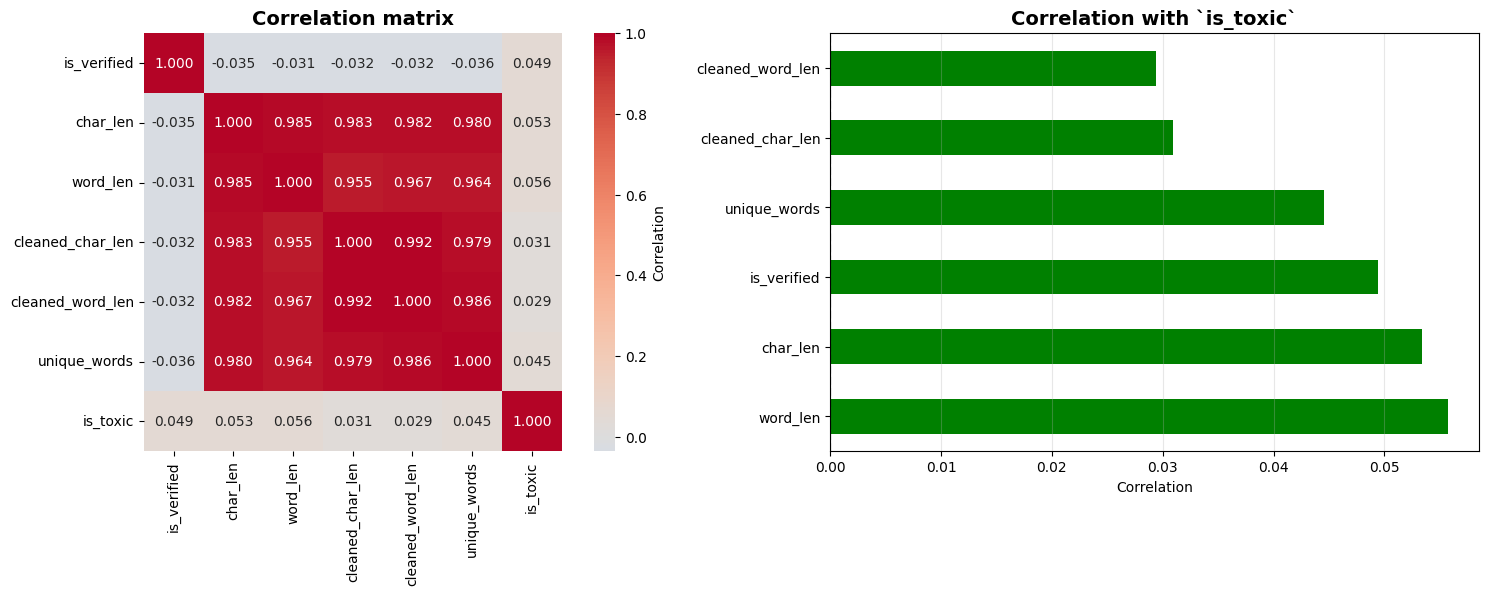

In [86]:
numeric_features = ['is_verified', 'char_len', 'word_len', 'cleaned_char_len', 'cleaned_word_len', 'unique_words', 'is_toxic']

corr_matrix = df[numeric_features].corr()

print_separator('correlation analysis')

print('Correlation with `is_toxic`:')
target_corr = corr_matrix['is_toxic'].sort_values(ascending=False)
print(target_corr)

_, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, ax=axes[0], cbar_kws={'label': 'Correlation'})
axes[0].set_title('Correlation matrix', fontsize=14, fontweight='bold')

target_corr_plot = target_corr.drop('is_toxic')
colors = ['green' if x > 0 else 'red' for x in target_corr_plot.values]
target_corr_plot.plot(kind='barh', ax=axes[1], color=colors)
axes[1].set_title('Correlation with `is_toxic`', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Correlation')
axes[1].axvline(x=0, color='black', linestyle='--')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


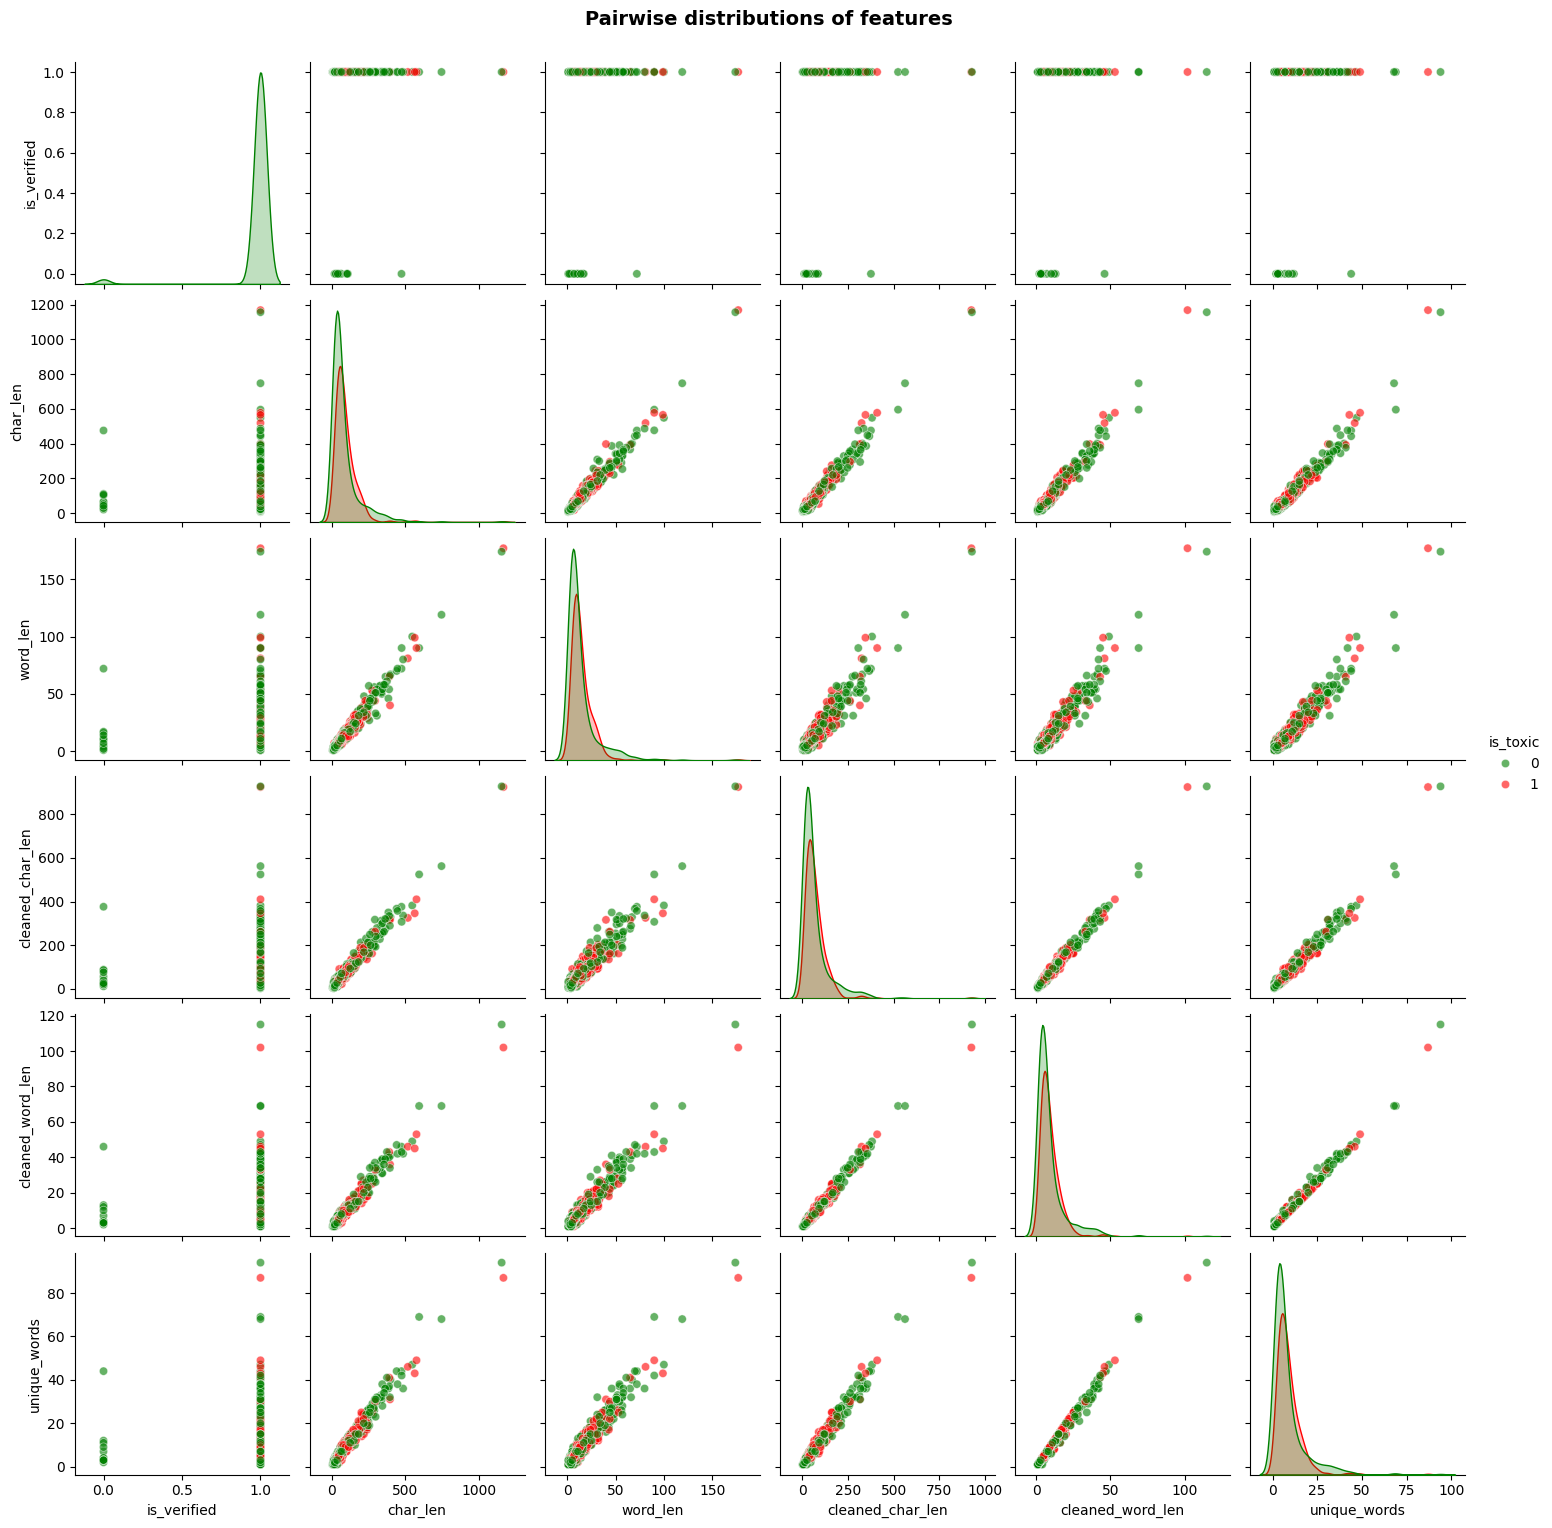

In [87]:
# Pairplot для ключевых признаков (на выборке)
sample_for_pairplot = df.sample(n=min(1000, len(df)), random_state=1)

sns.pairplot(sample_for_pairplot[numeric_features], 
             hue='is_toxic', palette={0: 'green', 1: 'red'}, 
             diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise distributions of features', y=1.02, fontsize=14, fontweight='bold')
plt.show()


### 13. Распределение Ципфа (Zipf's Law)

> "Если все слова языка (или просто достаточно длинного текста) упорядочить по убыванию частотности их использования, то частотность n-го слова в таком списке приблизительно обратно пропорциональна его порядковому номеру n (рангу этого слова)"

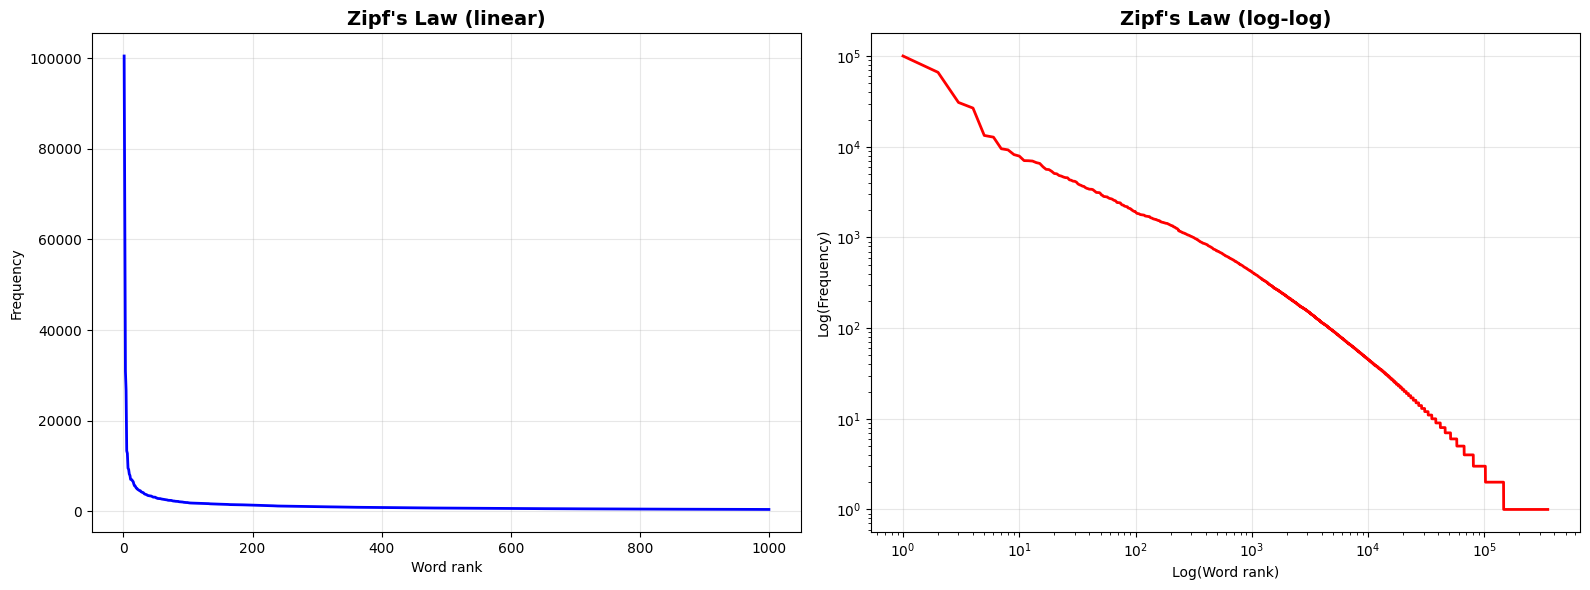

The log-log graph should be roughly linear for a natural language.


In [88]:
all_words = toxic_words + non_toxic_words
all_freq = Counter(all_words)

freqs_sorted = sorted(all_freq.values(), reverse=True)
ranks = np.arange(1, len(freqs_sorted) + 1)

_, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(ranks[:1000], freqs_sorted[:1000], 'b-', linewidth=2)
axes[0].set_title("Zipf's Law (linear)", fontsize=14, fontweight='bold')
axes[0].set_xlabel('Word rank')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.3)

axes[1].loglog(ranks, freqs_sorted, 'r-', linewidth=2)
axes[1].set_title("Zipf's Law (log-log)", fontsize=14, fontweight='bold')
axes[1].set_xlabel('Log(Word rank)')
axes[1].set_ylabel('Log(Frequency)')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print('The log-log graph should be roughly linear for a natural language.')


### 14. Platforms analysis

In [89]:
df['source_platform'].value_counts()

source_platform
ok.ru                                    244127
2ch.hk, Pikabu.ru, otveti.mail.ru        124390
2ch, pikabu                               14149
YouTube                                    1937
Social Media, TV-Scripts (South Park)      1452
лентач                                      982
медуза                                      932
дождь                                       887
Name: count, dtype: int64

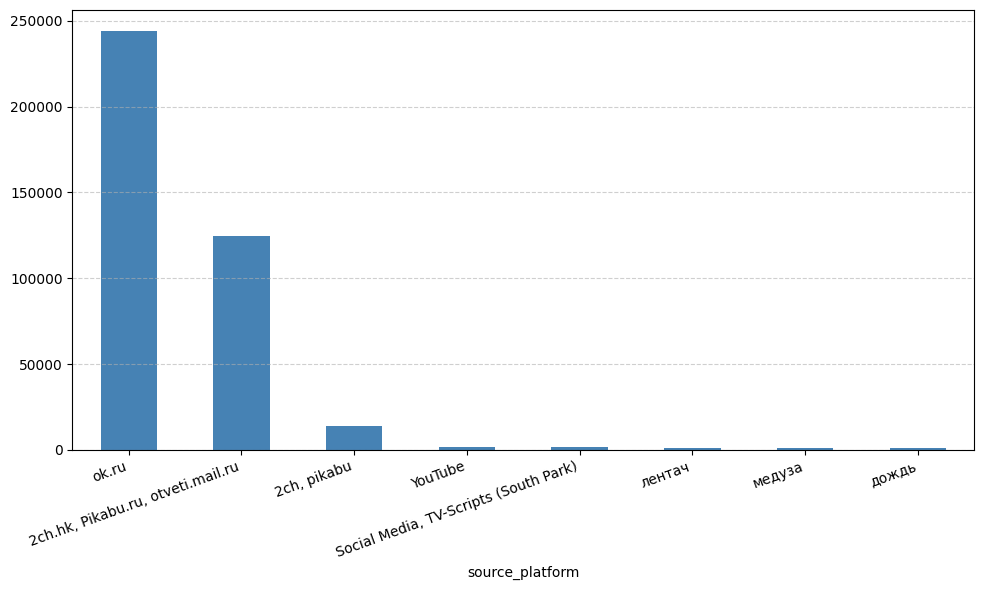

In [90]:
plt.figure(figsize=(10, 6))
df['source_platform'].value_counts().plot(kind='bar', color='steelblue')

plt.title = 'Top data platforms\nfor combined sources'
plt.xlabel = 'Платформа'
plt.ylabel = 'Кол-во'

plt.xticks(rotation=20, ha='right')

# y grid: 
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

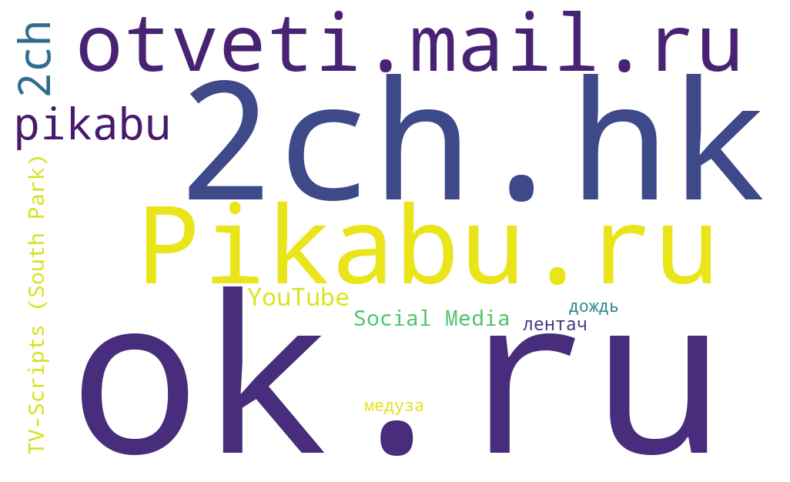

In [91]:
all_sources = []

for item in df['source_platform'].dropna():
    parts = [p.strip() for p in item.split(',')]
    all_sources.extend(parts)

freq_dict = dict(Counter(all_sources))

wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    colormap='viridis',
    prefer_horizontal=0.6,
    relative_scaling=0.5  
).generate_from_frequencies(freq_dict)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title = 'Unique platforms word cloud'
plt.tight_layout()
plt.show()

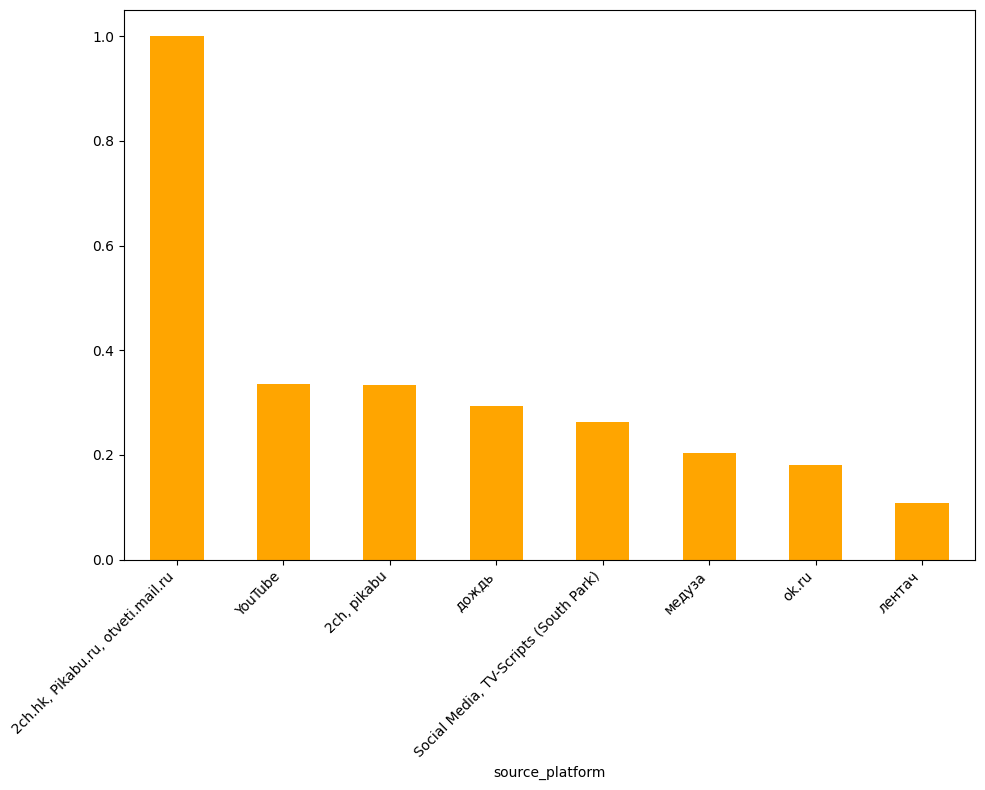

In [92]:
# ----- Compute average toxicity rate per platform -----
tox_by_platform = df.groupby('source_platform')['is_toxic'].mean().sort_values(ascending=False)

# ----- Plot top 10 platforms with highest toxicity -----
plt.figure(figsize=(10, 8))
ax = tox_by_platform.head(10).plot(kind='bar', color='orange')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.title = 'Average Toxicity Rate by Platform'
plt.ylabel = 'Toxicity rate'
plt.xlabel = 'Platform'
plt.tight_layout()
plt.show()